In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.svm import SVR

In [49]:
car=pd.read_csv("car data.csv")

In [50]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [51]:
car.groupby(['Fuel_Type']).count()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner
Fuel_Type,,,,,,,,
CNG,2,2,2,2,2,2,2,2
Diesel,60,60,60,60,60,60,60,60
Petrol,239,239,239,239,239,239,239,239


In [52]:
car.groupby(['Seller_Type']).count()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission,Owner
Seller_Type,,,,,,,,
Dealer,195,195,195,195,195,195,195,195
Individual,106,106,106,106,106,106,106,106


In [53]:
car.groupby(['Transmission']).count()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Owner
Transmission,,,,,,,,
Automatic,40,40,40,40,40,40,40,40
Manual,261,261,261,261,261,261,261,261


In [54]:
car.groupby(['Owner']).count()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
Owner,,,,,,,,
0,290,290,290,290,290,290,290,290
1,10,10,10,10,10,10,10,10
3,1,1,1,1,1,1,1,1


In [55]:
one_hot = pd.get_dummies(car['Fuel_Type'])
car = car.drop('Fuel_Type',axis = 1)
car = car.join(one_hot)

In [56]:
one_hot = pd.get_dummies(car['Seller_Type'])
car = car.drop('Seller_Type',axis = 1)
car = car.join(one_hot)

In [57]:
one_hot = pd.get_dummies(car['Transmission'])
car = car.drop('Transmission',axis = 1)
car = car.join(one_hot)

In [58]:
one_hot = pd.get_dummies(car['Owner'])
car = car.drop('Owner',axis = 1)
car = car.join(one_hot)

In [59]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,CNG,Diesel,Petrol,Dealer,Individual,Automatic,Manual,0,1,3
0,ritz,2014,3.35,5.59,27000,0,0,1,1,0,0,1,1,0,0
1,sx4,2013,4.75,9.54,43000,0,1,0,1,0,0,1,1,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,1,1,0,0,1,1,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,1,1,0,0,1,1,0,0
4,swift,2014,4.60,6.87,42450,0,1,0,1,0,0,1,1,0,0


<function matplotlib.pyplot.xticks(*args, **kwargs)>

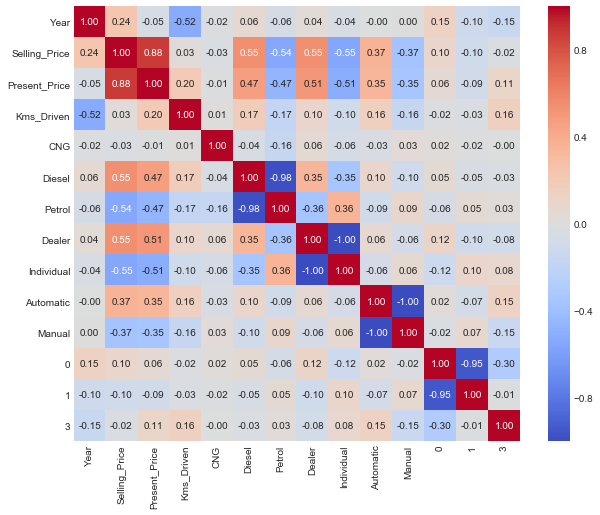

In [60]:
fig, ax = plt.subplots(figsize=(10,8))

correlation = car.corr()
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt=".2f")

plt.xticks

In [61]:
y=car.Selling_Price.values.reshape(-1,1)
x=car.drop(["Selling_Price","Car_Name"],axis=1).values

In [87]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(data=x)
y=scaler.fit_transform(y)
y=pd.DataFrame(data=y,columns=['selling_price'])
x.head()
#standardscaler yapınca daha yüksek başarı geliyor

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.128897,-0.236215,-0.256224,-0.081786,-0.498962,0.509327,0.737285,-0.737285,-0.39148,0.39148,0.194759,-0.185376,-0.057735
1,-0.217514,0.221505,0.155911,-0.081786,2.004162,-1.963374,0.737285,-0.737285,-0.39148,0.39148,0.194759,-0.185376,-0.057735
2,1.168129,0.257427,-0.773969,-0.081786,-0.498962,0.509327,0.737285,-0.737285,-0.39148,0.39148,0.194759,-0.185376,-0.057735
3,-0.910335,-0.403079,-0.817758,-0.081786,-0.498962,0.509327,0.737285,-0.737285,-0.39148,0.39148,0.194759,-0.185376,-0.057735
4,0.128897,-0.087890,0.141743,-0.081786,2.004162,-1.963374,0.737285,-0.737285,-0.39148,0.39148,0.194759,-0.185376,-0.057735


In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 13)
x test:  (61, 13)
y train:  (240, 1)
y test:  (61, 1)


In [78]:
def model(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_df=pd.DataFrame(y_pred)
    y_pred_df.head()
    print("train score" , model.score(x_train,y_train))
    print("test score" , model.score(x_test,y_test))
    R_2=r2_score(y_test,y_pred)
    cross_val=cross_val_score(model,x_train,y_train,cv=5)
    
    print("r_2 score :",R_2,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [79]:
regressor=LinearRegression(normalize=True)

In [80]:
model(regressor)

train score 0.8769826317584918
test score 0.9179827767356337
r_2 score : 0.9179827767356337 

CV scores: [ 7.82882792e-01  8.69773886e-01  8.11186146e-01 -3.94537049e+22
  8.97898585e-01] 

CV scores mean: -7.890740976504606e+21
Mean Absolute Error: 0.19481013060380753
Mean Squared Error: 0.0805143492980263
Root Mean Squared Error: 0.28375050537052143


In [81]:
print(regressor.intercept_)
print(regressor.coef_)

[-0.00700968]
[[ 0.22062494  0.73249377 -0.04165004 -0.02292916  0.07780425 -0.07020198
   0.0537227  -0.0537227   0.05119043 -0.05119043  0.00620178  0.03297437
  -0.0632237 ]]


In [82]:
clf = tree.DecisionTreeRegressor()

In [83]:
model(clf)

train score 1.0
test score 0.9623384258931327
r_2 score : 0.9623384258931326 

CV scores: [0.86773562 0.94466398 0.84961004 0.8868204  0.96541369] 

CV scores mean: 0.9028487450385896
Mean Absolute Error: 0.1270934392914839
Mean Squared Error: 0.03697146784620854
Root Mean Squared Error: 0.19227966051095613


In [84]:
#svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
#svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,coef0=1)

In [85]:
svr_poly.fit(x_train,y_train)

G:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, cache_size=200, coef0=1, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [86]:
model(svr_poly)

G:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
G:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
G:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
G:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

train score 0.9905936254164728
test score 0.9510904146762488
r_2 score : 0.9510904146762488 

CV scores: [  0.97446007   0.97218777  -5.83258811 -14.57438235   0.81452386] 

CV scores mean: -3.5291597518202935
Mean Absolute Error: 0.14459986839735578
Mean Squared Error: 0.04801337182661014
Root Mean Squared Error: 0.21911953775647242
